**About Dataset**

Sample Sales Data, Order Info, Sales, Customer, Shipping, etc., Used for Segmentation, Customer Analytics, Clustering and More. Inspired for retail analytics. This was originally used for Pentaho DI Kettle, But I found the set could be useful for Sales Simulation training.

Originally Written by María Carina Roldán, Pentaho Community Member, BI consultant (Assert Solutions), Argentina. This work is licensed under the Creative Commons Attribution-Noncommercial-Share Alike 3.0 Unported License. Modified by Gus Segura June 2014.

[Link for dataset](https://www.kaggle.com/datasets/kyanyoga/sample-sales-data?select=sales_data_sample.csv)

1. Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2. Leitura do Dataset

In [2]:
df = pd.read_csv("/content/sample_data/sales_data_sample.csv", encoding='latin1')
print("Primeiros registros:")
print(df.head())
print("\n")
print("Tamanho de linhas e colunas:")
print(df.shape)
print("\n")
print("Colunas do Dataset:")
print(df.columns)
print("\n")
print("Informações sobre os dados:")
print(df.info())
print("\n")
print("Colunas e tipos de dados")
print(df.dtypes)

Primeiros registros:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l

Com o uso dos métodos head() e shape(), conseguimos visualizar as primeiras linhas do dataset e identificar o seu tamanho, que neste caso possui 2823 linhas e 25 colunas.

O método columns retorna uma lista com os nomes de todas as colunas presentes no DataFrame.

O dtypes nos informa o tipo de dado presente em cada coluna, como:

* int64: números inteiros;
* float64: números decimais (com casas após a vírgula);
* object: geralmente dados do tipo texto, mas também pode conter outros tipos, como float, int e valores nulos (NaN).

O método info() fornece um resumo da estrutura do DataFrame. A coluna "Non-Null Count", presente nesse resumo, mostra a quantidade de valores não nulos em cada coluna. A partir disso, é possível identificar que as colunas ADDRESSLINE2, STATE, POSTALCODE e TERRITORY apresentam valores ausentes (NaN).

In [3]:
nomes = list(df['CUSTOMERNAME'])
for nome in nomes[:5]:
    print(nome)

Land of Toys Inc.
Reims Collectables
Lyon Souveniers
Toys4GrownUps.com
Corporate Gift Ideas Co.


In [4]:
dicionario = dict(zip(df['PRODUCTCODE'][:100], df['PRODUCTLINE'][:100]))
print(dicionario)

{'S10_1678': 'Motorcycles', 'S10_1949': 'Classic Cars', 'S10_2016': 'Motorcycles', 'S10_4698': 'Motorcycles'}


In [5]:
linha0 = df.iloc[0]
minha_tupla = (linha0['CUSTOMERNAME'], linha0['COUNTRY'], linha0['SALES'])
print(minha_tupla)

('Land of Toys Inc.', 'USA', np.float64(2871.0))


A análise dos nomes de clientes aponta para um modelo de negócio B2B. Para entender o catálogo, foi criada uma amostra do dicionário de produtos (usando [:100], tem valores duplicados, por isso "100"), que já foi suficiente para identificar o nicho de colecionáveis ("Motorcycles", "Classic Cars"). Por fim, a observação de uma única transação em formato de tupla confirma que cada registro contém uma venda completa, com cliente, origem e valor.

4. Estruturas Condicionais e Laços

In [6]:
coluna_numerica = 'SALES'
primeiro_valor = df[coluna_numerica][0]


if primeiro_valor >= 10000:
    print("Valor alto")
elif primeiro_valor < 10000:
    print("Valor intermediário")
else:
    print("Valor baixo")


soma = 0
lista = list(df[coluna_numerica][:1000])
for n in lista:
    soma += n
print("Soma dos 1000 primeiros valores:", soma)


limite = 100000
i = 0
while i < len(lista) and lista[i] <= limite:
    i += 1
if i < len(lista):
    print("Primeiro valor >", limite, "encontrado:", lista[i])
else:
    print("Nenhum valor maior que", limite, "encontrado nos primeiros 5.")

Valor intermediário
Soma dos 1000 primeiros valores: 4224333.64
Nenhum valor maior que 100000 encontrado nos primeiros 5.


5. Operadores Aritméticos e Manipulação de Dados

In [7]:
if 'MSRP' in df.columns and 'PRICEEACH' in df.columns:
    df['DIFERENCA_PRECO'] = df['MSRP'] - df['PRICEEACH']
    print("Diferença entre Preço Sugerido (MSRP) e Preço Praticado:")
    print(df[['MSRP', 'PRICEEACH', 'DIFERENCA_PRECO']].head())

if 'PRICEEACH' in df.columns:
    df['PRECO_COM_DESCONTO'] = df['PRICEEACH'] * 0.90
    print("\nPreço original vs. Preço com 10% de desconto:")
    print(df[['PRICEEACH', 'PRECO_COM_DESCONTO']].head())


Diferença entre Preço Sugerido (MSRP) e Preço Praticado:
   MSRP  PRICEEACH  DIFERENCA_PRECO
0    95      95.70            -0.70
1    95      81.35            13.65
2    95      94.74             0.26
3    95      83.26            11.74
4    95     100.00            -5.00

Preço original vs. Preço com 10% de desconto:
   PRICEEACH  PRECO_COM_DESCONTO
0      95.70              86.130
1      81.35              73.215
2      94.74              85.266
3      83.26              74.934
4     100.00              90.000


Ao criar a coluna DIFERENCA_PRECO (subtraindo o preço praticado do sugerido), identifiquei que a empresa não tem uma política fixa de descontos. Pelo contrário, em algumas vendas o produto foi vendido até 5,00 acima do preço de tabela (MSRP), enquanto em outras o desconto ultrapassou  13,00, mostrando uma estratégia de preços muito flexível.

6. NumPy e Arrays Numéricos

In [8]:
array_vendas = np.array(df['SALES'])

array_vendas_somado = array_vendas + 10
array_vendas_quadrado = array_vendas ** 2

print("Valores originais de vendas:")
print(array_vendas[:5])

print("\nValores de vendas com taxa de R$10:")
print(array_vendas_somado[:5])

print("\nValores de vendas ao quadrado:")
print(array_vendas_quadrado[:5])

# Métodos de agregação do NumPy para insights de negócio
print("\n--- KPIs do Negócio ---")
print(f"Soma Total de Vendas (Receita): R$ {array_vendas.sum():.2f}")
print(f"Valor Médio por Venda (Ticket Médio): R$ {array_vendas.mean():.2f}")

Valores originais de vendas:
[2871.   2765.9  3884.34 3746.7  5205.27]

Valores de vendas com taxa de R$10:
[2881.   2775.9  3894.34 3756.7  5215.27]

Valores de vendas ao quadrado:
[ 8242641.      7650202.81   15088097.2356 14037760.89   27094835.7729]

--- KPIs do Negócio ---
Soma Total de Vendas (Receita): R$ 10032628.85
Valor Médio por Venda (Ticket Médio): R$ 3553.89


Ao analisar os valores de vendas com e sem a aplicação de uma taxa fixa, notei que a inclusão de R$10 em cada transação, apesar de garantir um aumento direto na receita, representa uma variação muito pequena em relação ao valor total da venda.

7. Acesso e Manipulação de Dados com Pandas

In [9]:
#Número do pedido e seu status
df.loc[0:4, ['ORDERNUMBER', 'SALES', 'PRODUCTLINE']]

,ORDERNUMBER,SALES,PRODUCTLINE
0,10107,2871.00,Motorcycles
1,10121,2765.90,Motorcycles
2,10134,3884.34,Motorcycles
3,10145,3746.70,Motorcycles
4,10159,5205.27,Motorcycles


In [10]:
vendas_por_categoria = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)

# Exibe o resultado formatad
print(vendas_por_categoria.to_markdown(floatfmt=",.2f"))

| PRODUCTLINE      |        SALES |
|:-----------------|-------------:|
| Classic Cars     | 3,919,615.66 |
| Vintage Cars     | 1,903,150.84 |
| Motorcycles      | 1,166,388.34 |
| Trucks and Buses | 1,127,789.84 |
| Planes           |   975,003.57 |
| Ships            |   714,437.13 |
| Trains           |   226,243.47 |


A categoria "Classic Cars" (Carros Clássicos) é a líder absoluta, com vendas de quase RS4 milhões, representando aproximadamente 39% do faturamento total. Há uma diferença significativa de RS2 milhões entre ela e a segunda colocada, "Vintage Cars" (Carros Antigos).

8. Visualização de Dados{

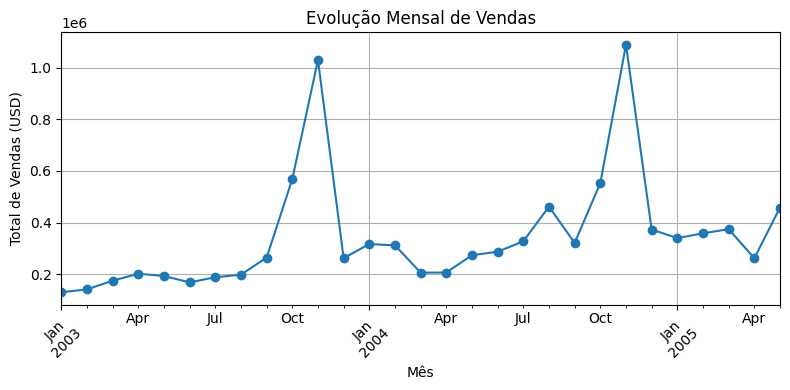

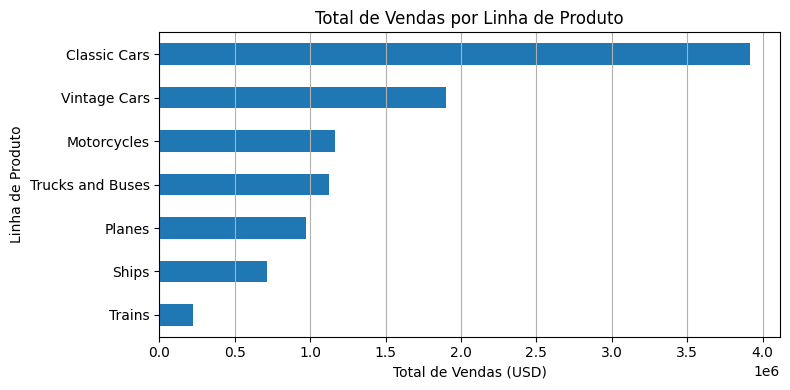

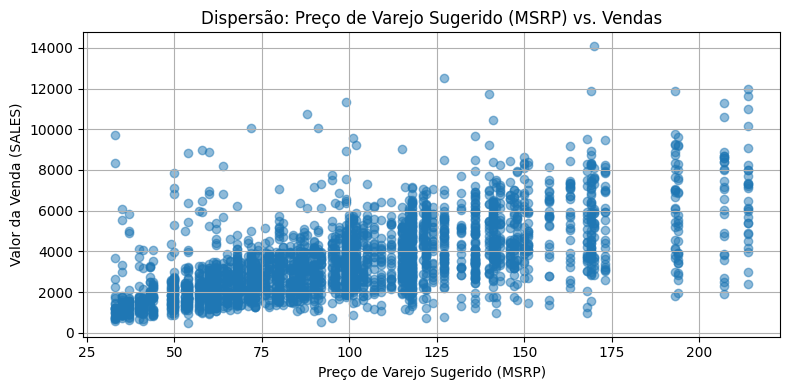

In [11]:
# Gráfico de Linha (Evolução das Vendas no Tempo)

df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
vendas_no_tempo = df.groupby(df['ORDERDATE'].dt.to_period('M'))['SALES'].sum()

plt.figure(figsize=(8, 4))
vendas_no_tempo.plot(kind='line', marker='o')
plt.title('Evolução Mensal de Vendas')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


# Gráfico de Barras (Vendas por Categoria de Produto)

vendas_por_produto = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values()

plt.figure(figsize=(8, 4))
vendas_por_produto.plot(kind='barh')
plt.title('Total de Vendas por Linha de Produto')
plt.xlabel('Total de Vendas (USD)')
plt.ylabel('Linha de Produto')
plt.grid(True, axis='x')
plt.tight_layout()


# Gráfico de Dispersão (Relação entre Preço Sugerido e Venda)

plt.figure(figsize=(8, 4))
plt.scatter(df['MSRP'], df['SALES'], alpha=0.5)
plt.title('Dispersão: Preço de Varejo Sugerido (MSRP) vs. Vendas')
plt.xlabel('Preço de Varejo Sugerido (MSRP)')
plt.ylabel('Valor da Venda (SALES)')
plt.grid(True)
plt.tight_layout()

O gráfico de "Evolução Mensal de Vendas" mostra claramente que as vendas disparam em novembro, tanto em 2003 quanto em 2004. Isso sugere um padrão sazonal forte, provavelmente ligado a promoções de fim de ano (como Black Friday) e compras de Natal.

O gráfico de "Total de Vendas por Linha de Produto" revela que a categoria "Classic Cars" é responsável por quase o dobro da receita da segunda colocada ("Vintage Cars").

A dispersão vertical em cada linha significa que, para um mesmo produto, o valor final da venda (SALES) varia muito.

9. Relatório Final

O desempenho do negócio é fortemente sazonal. As vendas disparam de forma consistente em novembro de cada ano, indicando que o período de festas de fim de ano é crucial para a receita anual. O planejamento de estoque e marketing para o quarto trimestre é fundamental.

A receita é altamente concentrada em uma única categoria. A linha de produto "Classic Cars" é a campeã absoluta, respondendo por quase 40% do faturamento total. Embora seja um ponto forte, isso representa um risco de dependência. Em contrapartida, a categoria "Trains" tem um desempenho muito baixo.

O valor dos pedidos é impulsionado pela quantidade, não pelo preço unitário. O gráfico de dispersão mostrou que as vendas de maior valor são geradas por pedidos com grande quantidade de itens de preço moderado (entre $100 e $170 de MSRP), e não pela venda de itens de luxo com alto preço individual.

A estratégia de precificação é bem definida. Os produtos estão agrupados em níveis de preço (price tiers) claros, em vez de terem valores aleatórios, o que sugere uma organização estratégica do catálogo.